In [1]:
## Import libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [2]:
## Import datasets 
df_flu = pd.read_csv("./flu_pneumonia.csv")

In [3]:
df_temp = pd.read_csv("./avg_winter_temperature.csv")

In [4]:
df_flu.head()

state  death_rate  death_abs
0    AK         8.4         41
1    AL        19.5       1097
2    AR        20.0        700
3    AZ         9.5        775
4    CA        14.8       6188

In [5]:
df_flu.tail()

state  death_rate  death_abs
45    VT        10.0         85
46    WA        10.7        851
47    WI        14.2       1052
48    WV        21.2        526
49    WY        16.0         99

In [6]:
df_temp.head()

state  avg_celsius
0    AK        -16.3
1    AL          8.1
2    AR          5.3
3    AZ          6.4
4    CA          7.9

In [8]:
df_temp.tail()

state  avg_celsius
45    VT         -7.0
46    WA          0.6
47    WI         -8.2
48    WV          0.4
49    WY         -6.0

In [9]:
## 1. Merge Data 
df = pd.merge(df_flu, df_temp, on= 'state')

In [10]:
df.head()

state  death_rate  death_abs  avg_celsius
0    AK         8.4         41        -16.3
1    AL        19.5       1097          8.1
2    AR        20.0        700          5.3
3    AZ         9.5        775          6.4
4    CA        14.8       6188          7.9

In [11]:
# 2. Create a function to convert temp
def convert_c_to_f(temp):
    return temp*1.8+32 

In [12]:
result = convert_c_to_f(25)
print(result)

77.0


In [13]:
print (convert_c_to_f(25))

77.0


In [14]:
# 3. Create a function to convert (the second way)
def convert_c_to_f(temp):
    return(temp -32)/1.8


In [15]:
print(convert_c_to_f(77))

25.0


In [16]:
def convert_temperature(temp, unit):
    if unit == 'F':
        return(temp -32)/1.8
    elif unit == 'C':
        return temp*1.8+32
    else:
        return('error')

In [17]:
print(convert_temperature(25,'C'))

77.0


In [18]:
print(convert_temperature(77, 'F'))

25.0


In [19]:
print(convert_temperature(77,'M'))

error


In [20]:
## 4. Convert column avg_celsius into f
df['avg_fahrenheit'] =np.nan

In [21]:
df.head()

state  death_rate  death_abs  avg_celsius  avg_fahrenheit
0    AK         8.4         41        -16.3             NaN
1    AL        19.5       1097          8.1             NaN
2    AR        20.0        700          5.3             NaN
3    AZ         9.5        775          6.4             NaN
4    CA        14.8       6188          7.9             NaN

In [22]:
for i in range(len(df)):
    #df.avg_fahrenheit[i] = convert_temperature(df.avg_celsius[i], 'C')
    df.loc[i,'avg_fahrenheit']= convert_temperature(df.avg_celsius[i], 'C')

In [24]:
df.drop('avg_celsius', 1, inplace= True)


In [25]:
df.head()

state  death_rate  death_abs  avg_fahrenheit
0    AK         8.4         41            2.66
1    AL        19.5       1097           46.58
2    AR        20.0        700           41.54
3    AZ         9.5        775           43.52
4    CA        14.8       6188           46.22

In [26]:
# 5. Corrleation 

np.corrcoef(df.avg_fahrenheit, df.death_rate)[0,1]

0.30437026828296365

In [27]:
np.corrcoef(df.avg_fahrenheit, df.death_abs)[0,1]

0.28406611130051046

In [29]:
# Create a function to interpret the results 
def interpret_corrcoef(value):
    if (value == -1):
        print('perfect negative relationship')
    elif(value > -1 and value <= -0.7):
        print('strong negative relationship')
    elif(value > -0.7 and value <= -0.5):
        print('moderate negative relationship')
    elif(value > -0.5 and value <=-0.3):
        print('weak negative')
    elif(value > -0.3 and  value <= 0.3):
        print('no relationship')
    elif(value > 0.3 and value <= 0.5):
        print('weak positive relationship')
    elif(value > 0.5 and value <= 0.7):
        print('moderate positive relationship')
    elif(value > 0.7 and value <= 1):
        print('strong positive relationship')
    elif (value == 1):
        print('perfect positive relationship')
    else:
        print('error')
        

In [30]:
interpret_corrcoef(1)

strong positive relationship


In [31]:
interpret_corrcoef(0.9)

strong positive relationship


In [32]:
interpret_corrcoef(0)

no relationship


In [33]:
interpret_corrcoef(0.301)

weak positive relationship


In [35]:
interpret_corrcoef(0.5)

weak positive relationship


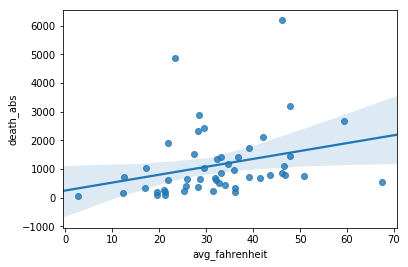

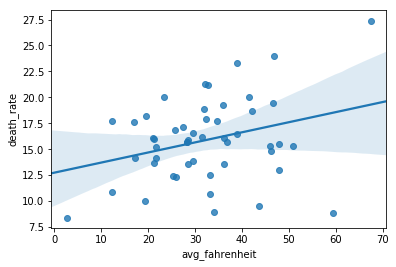

In [40]:
sns.regplot(x= 'avg_fahrenheit', y= 'death_rate', data=df)